In [4]:
import pandas as pd

In [5]:
# Reads in three datasets related to 2013 stats for California cities 

income = pd.read_csv("/Users/Dylan/Graduate School/Coursework/PSC290 Python/Week 2 - Pandas/CA_City_Median_Income.csv", na_values = ['**','-'])
poverty = pd.read_csv("/Users/Dylan/Graduate School/Coursework/PSC290 Python/Week 2 - Pandas/CA_City_Percent_Poverty.csv", na_values = ['**','-'])
crime = pd.read_csv("/Users/Dylan/Graduate School/Coursework/PSC290 Python/Week 2 - Pandas/Offenses_california_by_city_2013.csv")

In [6]:
# income - median income in dollars by city
income.head()

,Geographic Area,MedianDollar,Margin of Error
0,United States,53046.0,89.0
1,California,61094.0,157.0
2,Acalanes Ridge,152750.0,36185.0
3,Acampo,126923.0,35724.0
4,Acton,89886.0,10221.0


In [7]:
# poverty - percent of individuals below poverty level by city
poverty.head()

,Geographic Area,Percent,Margin of Error
0,United States,15.4,0.1
1,California,15.9,0.1
2,Acalanes Ridge,2.3,3.5
3,Acampo,0.0,5.1
4,Acton,11.7,5.2


In [8]:
# crime - number of occurences of particular crimes by city
crime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adelanto,31165,198,2,15,52,129,886,381,372,133,17
1,Agoura Hills,20762,19,0,2,10,7,306,109,185,12,7
2,Alameda,76206,158,0,10,85,63,1902,287,1285,330,17
3,Albany,19104,29,0,1,24,4,557,94,388,75,7
4,Alhambra,84710,163,1,9,81,72,1774,344,1196,234,7


In [9]:
# Merges poverty and income datasets using shared variable, 'Geographic Area', retains all data points
IncomeStats = pd.merge(income, poverty, how = 'outer', on = 'Geographic Area')

In [10]:
IncomeStats.head()

,Geographic Area,MedianDollar,Margin of Error_x,Percent,Margin of Error_y
0,United States,53046.0,89.0,15.4,0.1
1,California,61094.0,157.0,15.9,0.1
2,Acalanes Ridge,152750.0,36185.0,2.3,3.5
3,Acampo,126923.0,35724.0,0.0,5.1
4,Acton,89886.0,10221.0,11.7,5.2


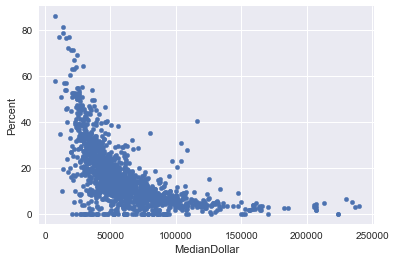

In [11]:
#Looks at the relationship between a city's median income and percent of individuals below poverty level as scatterplot
# As expected, the cities with the most individuals below the poverty level are also the poorest communities
import matplotlib.pyplot as plt
%matplotlib inline 
IncomeStats.plot.scatter(x= 'MedianDollar', y= 'Percent')

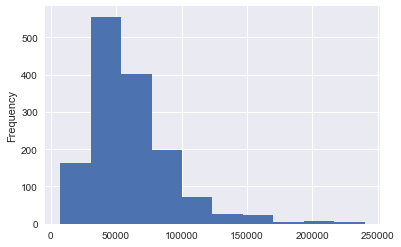

In [12]:
# Looks at distribution of median income in California cities
# Not surprisingly, the median incomes for California cities are skewed toward the lower end, 
# with morst cities under 100,000. 
IncomeStats.MedianDollar.plot.hist()

In [135]:
# What city has the most violent crime?
crime['City'][crime['Violent\rcrime'].argmax()]

'Los Angeles'

In [136]:
# What city has the least crime?
crime['City'][crime['Violent\rcrime'].argmin()]

'Belvedere'

In [140]:
# Makes a new variable that looks at violent crimes per capita
crime.PerCapita = crime['Violent\rcrime']/crime['Population']

In [141]:
# Los Angeles is the largest city, so it's not surprising that it has the most overall incidences of crime
# What city has the most violent crime per capita?
crime['City'][crime.PerCapita.argmax()]

'Industry'

In [144]:
# Lowest crime per capita
crime['City'][crime.PerCapita.argmin()]

'Belvedere'

In [138]:
# What city has the lowest median income?
income['Geographic Area'][income['MedianDollar'].argmin()]

'Tonyville'

In [139]:
# What city has the highest percent individuals in poverty?
poverty['Geographic Area'][poverty['Percent'].argmax()]

'Belden'

In [14]:
#Is the occurence of specific crimes or crimes in general in California cities associated with these variables? 

In [13]:
# Combines crime stats with income stats, only retaining values shared by both datasets 
IncomeCrime = pd.merge(crime, IncomeStats, how = 'inner', left_on = 'City', right_on = 'Geographic Area')
IncomeCrime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Geographic Area,MedianDollar,Margin of Error_x,Percent,Margin of Error_y
0,Adelanto,31165,198,2,15,52,129,886,381,372,133,17,Adelanto,38768.0,4284.0,33.7,4.9
1,Agoura Hills,20762,19,0,2,10,7,306,109,185,12,7,Agoura Hills,107885.0,6627.0,7.1,2.5
2,Alameda,76206,158,0,10,85,63,1902,287,1285,330,17,Alameda,74606.0,2586.0,10.3,1.3
3,Albany,19104,29,0,1,24,4,557,94,388,75,7,Albany,79926.0,9730.0,10.6,2.1
4,Alhambra,84710,163,1,9,81,72,1774,344,1196,234,7,Alhambra,54148.0,2289.0,13.9,1.3


In [15]:
# Determines how many cities were captured by both datasets
len(IncomeCrime)

454

In [145]:
# What is the median income of the cities with the most and least crime per capita?
# Not surprisingly, the median income for the low crime city is much higher than for the high crime city
print('Most Crime per Capita Median Income\n')
print(IncomeCrime.MedianDollar[IncomeCrime.City == 'Industry'])
print('\nLeast Crime per Capita Median Income\n')
print(IncomeCrime.MedianDollar[IncomeCrime.City == 'Belvedere'])

Most Crime per Capita Median Income

186    49329.0
Name: MedianDollar, dtype: float64

Least Crime per Capita Median Income

31    166071.0
Name: MedianDollar, dtype: float64


In [16]:
# clean up extra variables
del IncomeCrime['Geographic Area']

In [17]:
# We might just want to look at the middle-size cities, rather than the small or large population cities
MiddlePop =  IncomeCrime[IncomeCrime.Population.isin(range(50000,100000))]

In [18]:
# get quantiles to help look at trends for lower and upper income groups
MiddlePop.quantile([0.25,0.75])

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,MedianDollar,Margin of Error_x,Percent,Margin of Error_y
0.25,58945.00,103.0,0.0,6.0,31.00,63.00,1287.75,262.0,801.25,117.75,3.25,48743.5,2289.50,8.10,1.3
0.75,81268.25,282.0,3.0,15.0,84.75,175.25,2211.75,513.0,1373.25,367.25,13.00,80037.0,3919.75,18.65,2.1


In [63]:
# subset cities with values in the lower and upper quantiles for key income variables
HiPov = MiddlePop[MiddlePop.Percent >= 18]
LowPov = MiddlePop[MiddlePop.Percent <= 8]
HiInc = MiddlePop[MiddlePop.MedianDollar >= 80037]
LowInc = MiddlePop[MiddlePop.MedianDollar <= 48744]

In [20]:
import seaborn as sns

# The plots below show the relationship between crime occurence and poverty/income measures separated by upper and lower quartiles
# Many of these plots suggest that in very low income cities, level of poverty doesn't have much effect on crime incidence
# Though the cities with the lowest median incomes do seem to have higher crime rates in general
# In higher income cities, median level of income of cities is often negatively associated with crime
# The only measure for which this does not appear true is arson, which increases with cities median income


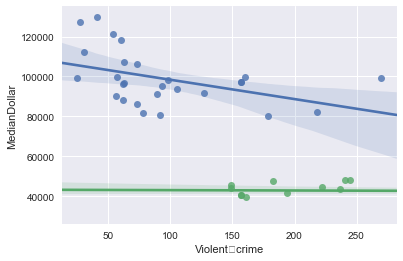

In [64]:
sns.regplot(x= 'Violent\rcrime', y= 'MedianDollar', data=HiInc)
sns.regplot(x= 'Violent\rcrime', y= 'MedianDollar', data=LowInc)

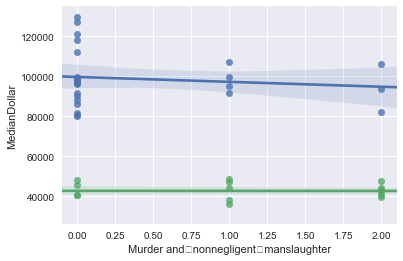

In [68]:
sns.regplot(x= 'Murder and\rnonnegligent\rmanslaughter', y= 'MedianDollar', data=HiInc)
sns.regplot(x= 'Murder and\rnonnegligent\rmanslaughter', y= 'MedianDollar', data=LowInc)

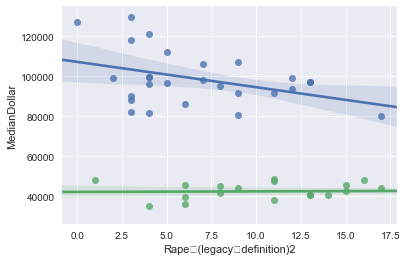

In [70]:
sns.regplot(x= 'Rape\r(legacy\rdefinition)2', y= 'MedianDollar', data=HiInc)
sns.regplot(x= 'Rape\r(legacy\rdefinition)2', y= 'MedianDollar', data=LowInc)

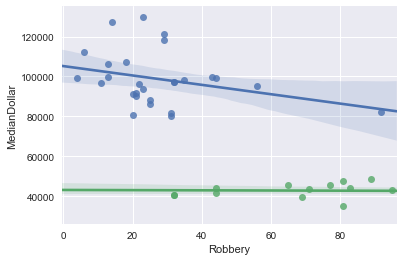

In [71]:
sns.regplot(x= 'Robbery', y= 'MedianDollar', data=HiInc)
sns.regplot(x= 'Robbery', y= 'MedianDollar', data=LowInc)

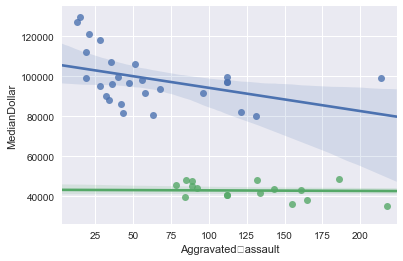

In [73]:
sns.regplot(x= 'Aggravated\rassault', y= 'MedianDollar', data=HiInc)
sns.regplot(x= 'Aggravated\rassault', y= 'MedianDollar', data=LowInc)

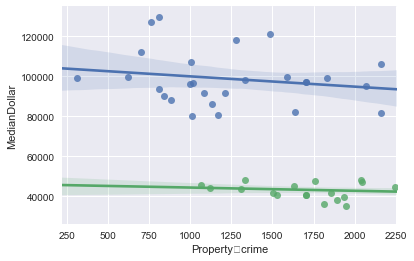

In [75]:
sns.regplot(x= 'Property\rcrime', y= 'MedianDollar', data=HiInc)
sns.regplot(x= 'Property\rcrime', y= 'MedianDollar', data=LowInc)

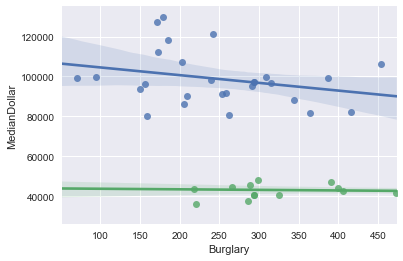

In [77]:
sns.regplot(x= 'Burglary', y= 'MedianDollar', data=HiInc)
sns.regplot(x= 'Burglary', y= 'MedianDollar', data=LowInc)
#

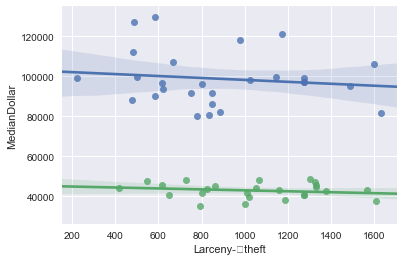

In [79]:
sns.regplot(x= 'Larceny-\rtheft', y= 'MedianDollar', data=HiInc)
sns.regplot(x= 'Larceny-\rtheft', y= 'MedianDollar', data=LowInc)


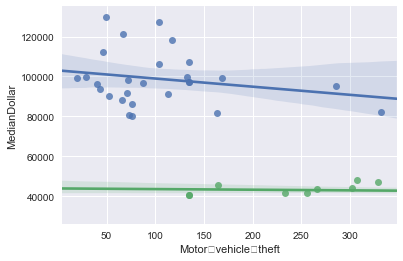

In [81]:
sns.regplot(x= 'Motor\rvehicle\rtheft', y= 'MedianDollar', data=HiInc)
sns.regplot(x= 'Motor\rvehicle\rtheft', y= 'MedianDollar', data=LowInc)

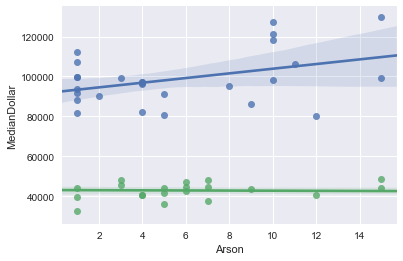

In [84]:
sns.regplot(x= 'Arson', y= 'MedianDollar', data=HiInc)
sns.regplot(x= 'Arson', y= 'MedianDollar', data=LowInc)

In [ ]:


# The remaining plots show the relationship between poverty level (percent below poverty line) and crime occurence
# The instance of crimes in low poverty areas appears to be much lower than in high poverty areas across crime measures



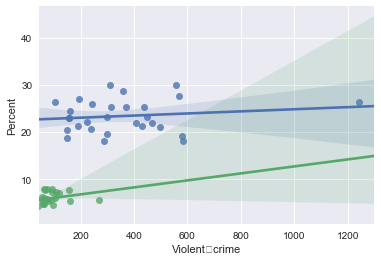

In [65]:
sns.regplot(x= 'Violent\rcrime', y= 'Percent', data=HiPov)
sns.regplot(x= 'Violent\rcrime', y= 'Percent', data=LowPov)

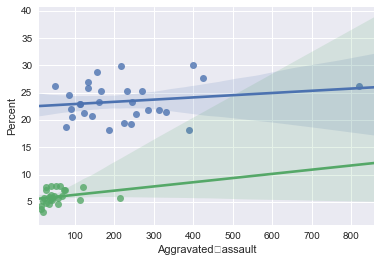

In [72]:
sns.regplot(x= 'Aggravated\rassault', y= 'Percent', data=HiPov)
sns.regplot(x= 'Aggravated\rassault', y= 'Percent', data=LowPov)

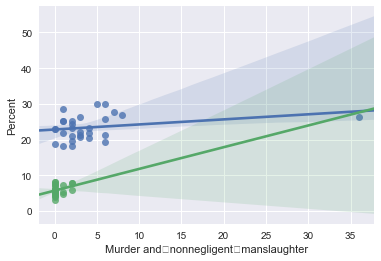

In [66]:
sns.regplot(x= 'Murder and\rnonnegligent\rmanslaughter', y= 'Percent', data=HiPov)
sns.regplot(x= 'Murder and\rnonnegligent\rmanslaughter', y= 'Percent', data=LowPov)

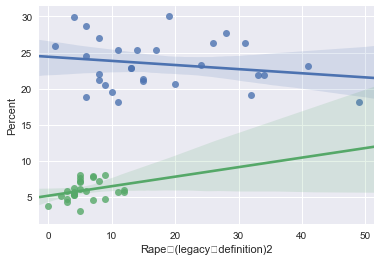

In [69]:
sns.regplot(x= 'Rape\r(legacy\rdefinition)2', y= 'Percent', data=HiPov)
sns.regplot(x= 'Rape\r(legacy\rdefinition)2', y= 'Percent', data=LowPov)

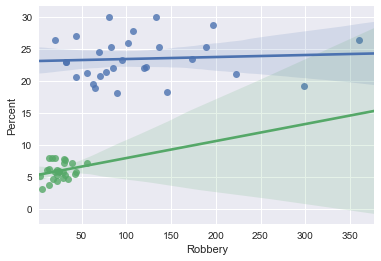

In [48]:
sns.regplot(x= 'Robbery', y= 'Percent', data=HiPov)
sns.regplot(x= 'Robbery', y= 'Percent', data=LowPov)

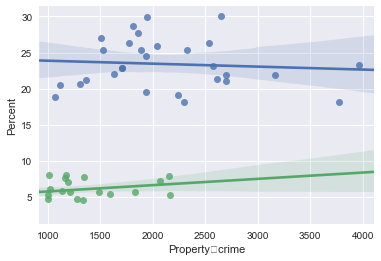

In [74]:
sns.regplot(x= 'Property\rcrime', y= 'Percent', data=HiPov)
sns.regplot(x= 'Property\rcrime', y= 'Percent', data=LowPov)

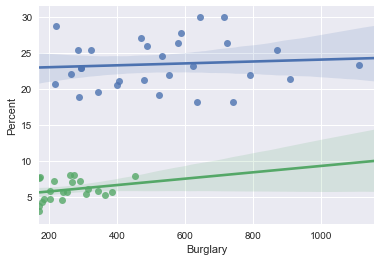

In [76]:
sns.regplot(x= 'Burglary', y= 'Percent', data=HiPov)
sns.regplot(x= 'Burglary', y= 'Percent', data=LowPov)

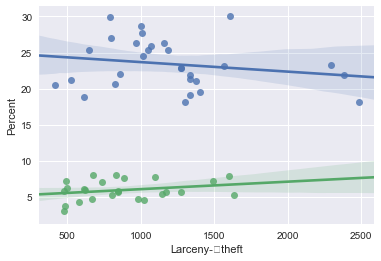

In [78]:
sns.regplot(x= 'Larceny-\rtheft', y= 'Percent', data=HiPov)
sns.regplot(x= 'Larceny-\rtheft', y= 'Percent', data=LowPov)


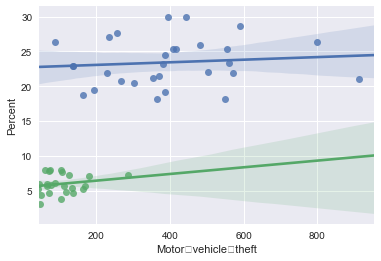

In [80]:
sns.regplot(x= 'Motor\rvehicle\rtheft', y= 'Percent', data=HiPov)
sns.regplot(x= 'Motor\rvehicle\rtheft', y= 'Percent', data=LowPov)


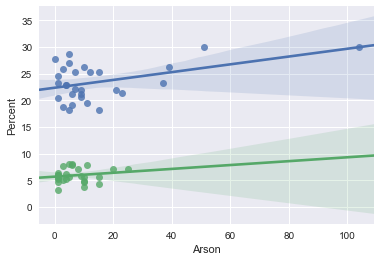

In [82]:
sns.regplot(x= 'Arson', y= 'Percent', data=HiPov)
sns.regplot(x= 'Arson', y= 'Percent', data=LowPov)

In [ ]:
# Conclusion: If you want to avoid crime, live among the rich!